First we are going to install some dependencies:
* Tensorflow and tensorflow-gpu is what we are going to use to build the deep learning model
* Opencv-python is going to be use to preprocess the data
* Matplotlib will be use to visualize these images

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib pandas scikit-learn

We are going to import two key dependencies:
* Tensorflow as said earlier for the model
* Os is going to be use to navigate to data regardless of your system

In [3]:
import os
import tensorflow as tf

Because when we are doing big models with large datasets, It will expand and use all the gpu we have available. We need to prevent an Out Of Memory Error using these lines below:
* What we do is first list all the gpus we have.
* The next loop is limiting the memory growth of each gpu and keeping it to the minimum or what It really need.

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

We need to import some dependencies:
   * Pandas for reading the csv
   * tqmd for aesthetic progress load of the images
   * All the keras imports are for preprocessing

In [5]:
import pandas as pd
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.utils import load_img , img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

No we must define the path for our data to be readen. We are going to read the train data. To see if it was correct we are going to show the head of our data.

In [6]:
data_dir='data'
dtrain=pd.read_csv(os.path.join(data_dir,'train.csv'))
dtrain.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png


Now we are going obtain the images refers in the train csv we just have read. For that first we will iterate and for each row we will:
* Obtain the path of the image store in the column "example_path"
* Convert that image into an array
* We will use the magical formula of optimitation dividing the array by 255
* We will added to our collection named "train_image"

Finally we will set our X value this train_image array

In [7]:
train_image = []
for i in tqdm(range(dtrain.shape[0])):
    img = load_img(os.path.join(data_dir,dtrain['example_path'][i]))
    img = img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)


100%|██████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:30<00:00, 55.72it/s]


As we can see our array has 1714 images each with a size of (332,332,3)

In [8]:
X.shape


(1714, 332, 332, 3)

In order to see if all we did is correct lets show a image of the array using matplotlib

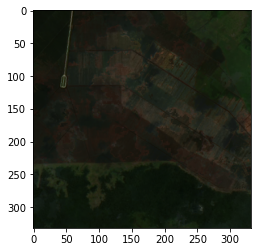

In [9]:
plt.imshow(X[8])

Now that we have loaded the images we are going to divided by the label. 

In [10]:
y = np.array(dtrain.drop(['example_path', 'latitude','longitude','year'],axis=1))

As we can see we have 1714 images and we only be focussing on the label column

In [11]:
y.shape

(1714, 1)

Now we are dividing the train data into two types:
* The first one will be the train data representing 90 percent of our images from the train csv
* The second one is the test data representing 10 percent of our images also form the train csv

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39, test_size=0.1)

* Conv2D creates the convolutional layer containing a series of kernels in order to teach the model, in our model it has 16 filters with a kernel size of 5x5 and our inputs has the shape of our images. 
* MaxPooling2D is 

In [13]:

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
#model.summary()

In [16]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/2
25/25 [==============================] - 203s 7s/step - loss: 1.8864 - accuracy: 0.1498 - val_loss: 1.5959 - val_accuracy: 0.1279
Epoch 2/2
25/25 [==============================] - 245s 10s/step - loss: 1.8196 - accuracy: 0.1128 - val_loss: 1.5959 - val_accuracy: 0.1279


We will do the same loading the test as we do with the train in order to load the test data

In [17]:
dtest_final=pd.read_csv(os.path.join(data_dir,'test.csv'))
dtest_final.head()

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png


In [18]:
test_image_final = []
for i in tqdm(range(dtest_final.shape[0])):
    img = load_img(os.path.join(data_dir,dtest_final['example_path'][i]))
    img = img_to_array(img)
    img = img/255
    test_image_final.append(img)
X_test_final = np.array(test_image_final)


100%|████████████████████████████████████████████████████████████████████████████████| 635/635 [00:09<00:00, 63.81it/s]


In [19]:
X_test_final.shape

(635, 332, 332, 3)

1/1 [==============================] - 1s 1s/step
[[23.77867]]


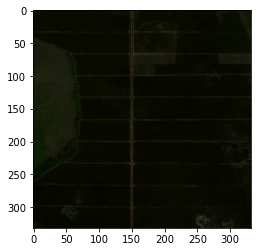

In [20]:
img=X_test_final[512]

print(model.predict(img.reshape(1,332, 332, 3)))

plt.imshow(img)